In [4]:
import matplotlib as mpl
import illustris_python as il
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm 
import numpy as np
path = '/home/tnguser/sims.TNG/TNG100-1/output/'
#stars_pos = il.snapshot.loadHalo(path, 'snapshot ', 'group','stars',['Coordinates'])

In [5]:
plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=20)

In [6]:
basePath = '/home/tnguser/sims.TNG/TNG100-1/output'
fields = ['Group_R_Crit200', 'GroupCM']
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)

In [4]:
fossil_df = pd.read_csv('fossil')

In [5]:
fossil_df = pd.read_csv('fossilgraphs.csv')

In [11]:
cm=[]
for i in range(len(fossil_df['number'])):
    cm.append(halos['GroupCM'][fossil_df.iloc[i,0]]/0.6774)
fossil_df['CM_pos'] = cm


In [12]:
r200=[]
for i in range(len(fossil_df['number'])):
    r200.append(halos['Group_R_Crit200'][fossil_df.iloc[i,0]]/0.6774)
fossil_df['R200'] = r200

In [6]:
star_pos=[]
gas_pos=[]


for i in range(len(fossil_df['Groupnumber'])):
    star_pos.append([])
    gas_pos.append([])


for i in tqdm(range(len(fossil_df['Groupnumber']))):
    a = fossil_df['Groupnumber']
    star_pos[i] = (il.snapshot.loadHalo(path, 99, a[i], 'stars', ['Coordinates']))
    gas_pos[i] = (il.snapshot.loadHalo(path, 99, a[i], 'gas', ['Coordinates']))


100%|██████████| 68/68 [00:39<00:00,  1.74it/s]


100%|██████████| 17/17 [00:21<00:00,  1.28s/it]


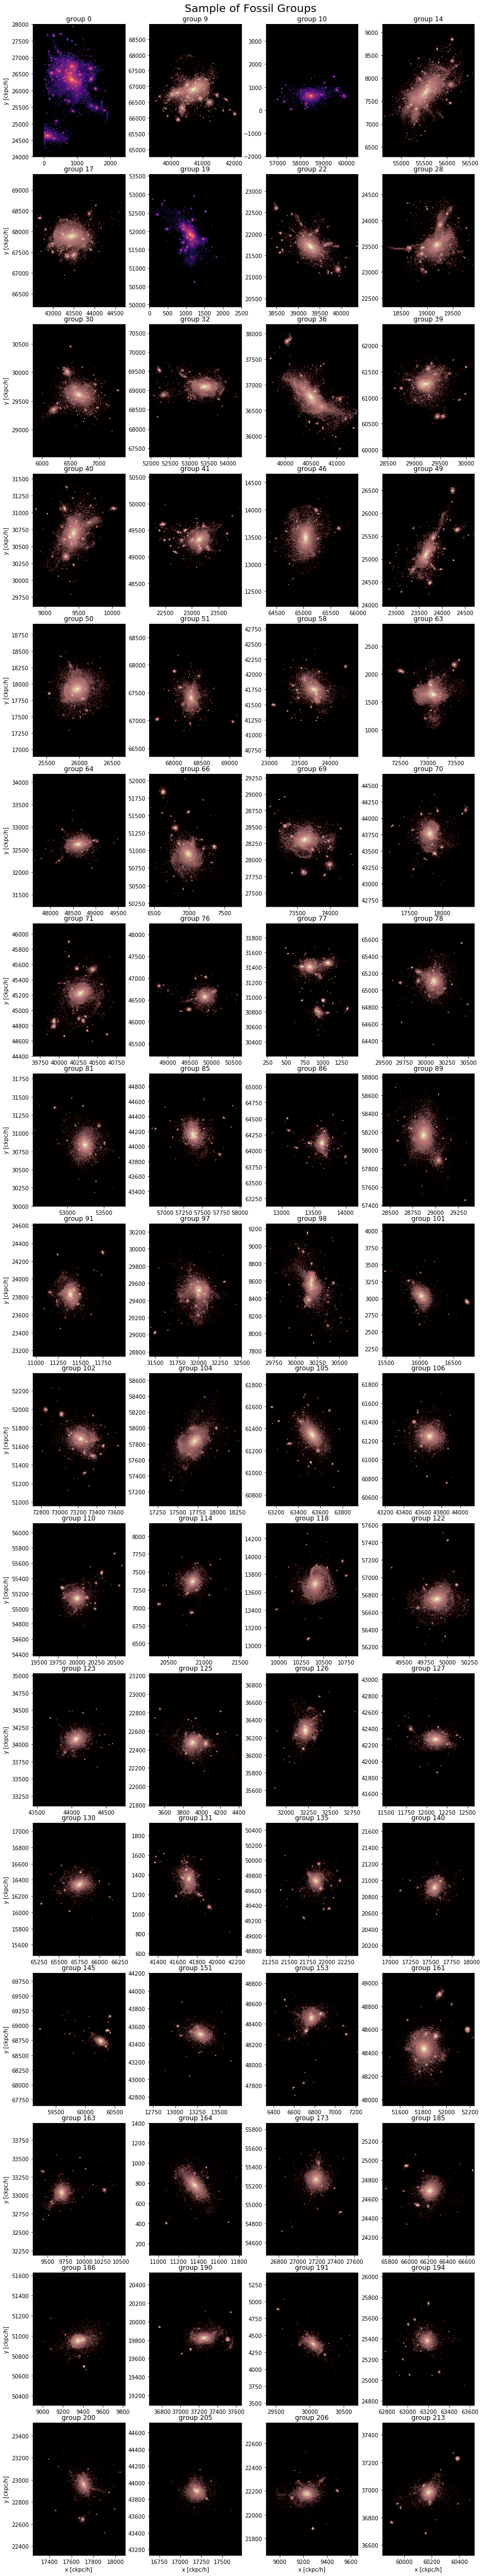

In [93]:
i=0
plt.rcParams['axes.facecolor'] = 'black'

fig, axes = plt.subplots(17,4, figsize=(12,65))
fig.tight_layout()
for n in tqdm(range(17)):
    for m in range(4):
        if i == 2: #10
            stars_pos = il.snapshot.loadHalo(basePath,99, fossil_df['Groupnumber'][i],'stars',['Coordinates'])
            axes[n,m].hist2d(stars_pos[:,0], stars_pos[:,1], cmap='magma',norm=mpl.colors.LogNorm(), bins=256, range=[[56500,60500],[0,1700]])
            axes[n,m].axis('equal')
            axes[n,m].title.set_text(f'group {fossil_df.iloc[i,1]}')
            i=i+1
        elif i == 0: #0
            stars_pos = il.snapshot.loadHalo(basePath,99, fossil_df['Groupnumber'][i],'stars',['Coordinates'])
            axes[n,m].hist2d(stars_pos[:,0], stars_pos[:,1], cmap='magma',norm=mpl.colors.LogNorm(), bins=256, range=[[0,2100],[24000,28000]])
            axes[n,m].axis('equal')
            axes[n,m].title.set_text(f'group {fossil_df.iloc[i,1]}')
            i=i+1
        elif i == 5: #19
            stars_pos = il.snapshot.loadHalo(basePath,99, fossil_df['Groupnumber'][i],'stars',['Coordinates'])
            axes[n,m].hist2d(stars_pos[:,0], stars_pos[:,1], cmap='magma',norm=mpl.colors.LogNorm(), bins=256, range=[[0,2500],[50500,53000]])
            axes[n,m].axis('equal')
            axes[n,m].title.set_text(f'group {fossil_df.iloc[i,1]}')
            i=i+1
        else:
            stars_pos = il.snapshot.loadHalo(basePath,99, fossil_df['Groupnumber'][i],'stars',['Coordinates'])
            #gas_pos = il.snapshot.loadSubhalo(basePath, 99, fossil_df['Groupnumber'][i], 'gas', ['Coordinates'])
            #axes[n,m].hist2d(gas_pos[:,0], gas_pos[:,1], cmap='Blues',norm=mpl.colors.LogNorm(), bins=64)
            #axes[n,m].hist2d(stars_pos[:,0], stars_pos[:,1], cmap='magma_r',norm=mpl.colors.LogNorm(), bins=128, range=[[xmin,xmax],[ymin,ymax]])
            axes[n,m].hist2d(stars_pos[:,0], stars_pos[:,1], cmap='pink',norm=mpl.colors.LogNorm(), bins=256)
            axes[n,m].axis('equal')
            axes[n,m].title.set_text(f'group {fossil_df.iloc[i,1]}')
            i = i+1


            

plt.setp(axes[-1,:], xlabel='x [ckpc/h]')
plt.setp(axes[:, 0], ylabel='y [ckpc/h]')
plt.suptitle('Sample of Fossil Groups',fontsize=20, y=1.005, x=0.5)
plt.savefig('fossilimages.jpg')
plt.show()

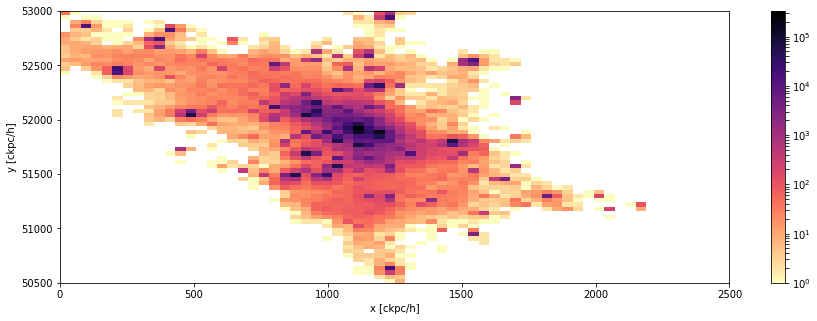

In [80]:
plt.figure(figsize=(15,5))
plt.rcParams['axes.facecolor'] ='white'
#'063c73'
stars_pos = il.snapshot.loadHalo(path, 99, 19,'stars',['Coordinates'])
plt.hist2d(stars_pos[:,0], stars_pos[:,1], cmap='magma_r',norm=mpl.colors.LogNorm(), bins=64, range=[[0,2500],[50500,53000]])
plt.colorbar()
#plt.Circle((17650,58000), 5000, color='red')
#plt.axis('equal')
plt.xlabel('x [ckpc/h]')
plt.ylabel('y [ckpc/h]')
plt.show()

In [1]:
fossilcarac = [69,91,118,145]

100%|██████████| 2/2 [00:00<00:00,  7.47it/s]


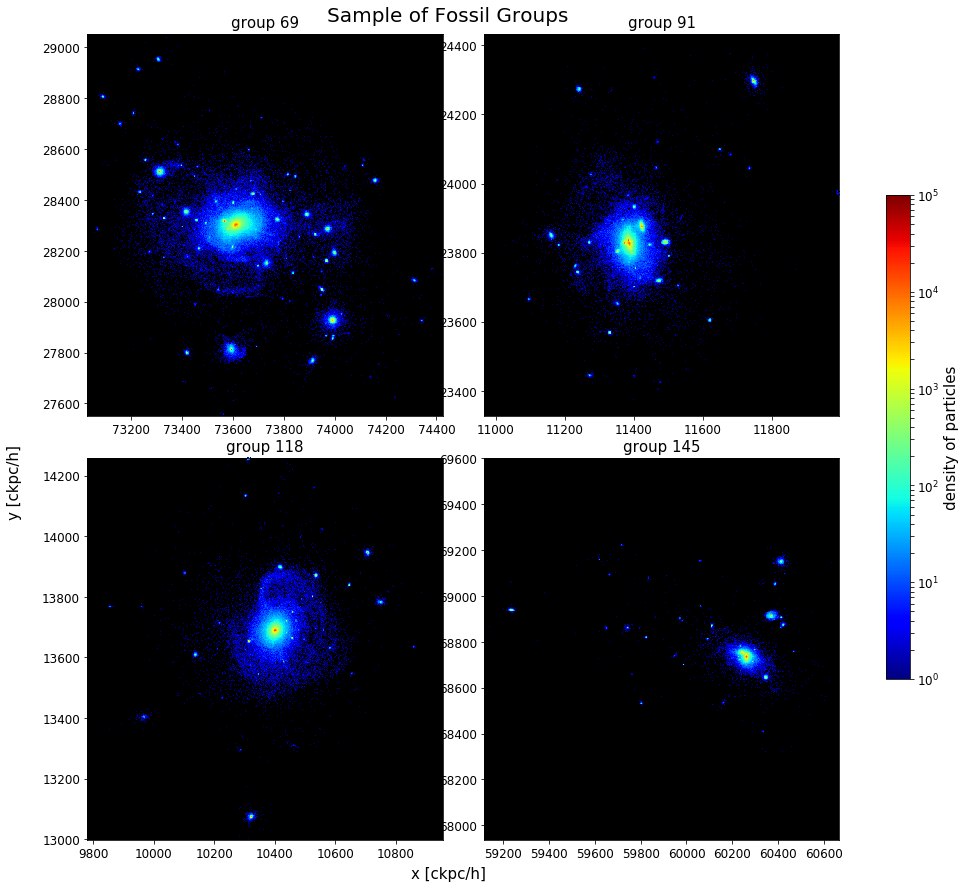

In [63]:
i=0

plt.rcParams['axes.facecolor'] = 'black'

fig, axes = plt.subplots(2,2, figsize=(14,12))
fig.tight_layout()
for n in tqdm(range(2)):
    for m in range(2):
        stars_pos = il.snapshot.loadHalo(basePath,99, fossilcarac[i],'stars',['Coordinates'])
        #gas_pos = il.snapshot.loadSubhalo(basePath, 99, fossil_df['Groupnumber'][i], 'gas', ['Coordinates'])
        #axes[n,m].hist2d(gas_pos[:,0], gas_pos[:,1], cmap='Blues',norm=mpl.colors.LogNorm(), bins=64)
        #axes[n,m].hist2d(stars_pos[:,0], stars_pos[:,1], cmap='magma_r',norm=mpl.colors.LogNorm(), bins=128, range=[[xmin,xmax],[ymin,ymax]])
        a = axes[n,m].hist2d((stars_pos[:,0]), (stars_pos[:,1]), cmap='jet', norm=mpl.colors.LogNorm(vmin=1, vmax=100000), bins=512)
        axes[n,m].axis('equal')
        axes[n,m].title.set_text(f'group {fossilcarac[i]}')
        i=i+1


fig.colorbar(a[3], ax = axes[:,:],shrink=0.6, label='density of particles')
fig.text(0.4,-0.005, 'x [ckpc/h]', ha="center", va="bottom")
fig.text(-0.03,0.5, 'y [ckpc/h]', ha="center", va="top", rotation=90)
plt.suptitle('Sample of Fossil Groups',fontsize=20, y=1.007, x=0.4)
plt.savefig('fossilcarac.jpg')

plt.show()